In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./laptop_details.csv")

## **Data Exploration**

In [2]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
df['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [4]:
df['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [5]:
df.shape

(720, 4)

In [6]:
df.duplicated().sum()

np.int64(297)

In [7]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [8]:
df.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


### **Finding**

 - Data have 720 Rows and Columns
 - MRP need treatment because it contain strings like rupee simple and comma ','
 - Drop Rating
 - already less data so be carefull about null n duplicated values...

## **Data Preprocessing**

**Rating**

In [9]:
# df = df.drop(columns=['Rating'])
df.drop(columns=['Rating'], inplace=True)
# df.drop('Rating',axis=1, inplace=True)

In [10]:
df.head()

,Product,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


**MRP**

In [11]:
df['MRP'] = df.MRP.str.replace("₹","")

In [12]:
df['MRP'] = df.MRP.str.replace(",","")

In [13]:
df['MRP'] = df['MRP'].astype('float32')

In [14]:
df['MRP']

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
715     23490.0
716     73490.0
717    194990.0
718    125990.0
719     50990.0
Name: MRP, Length: 720, dtype: float32

In [15]:
df['MRP'].describe()

count       720.000000
mean      81605.835938
std       61552.953125
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: MRP, dtype: float64

In [16]:
df['MRP'].median()

np.float32(59990.0)

<Axes: ylabel='Density'>

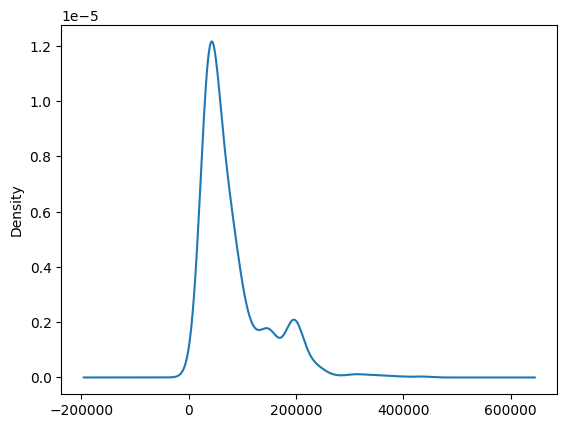

In [17]:
df['MRP'].plot(kind="kde")

<Axes: >

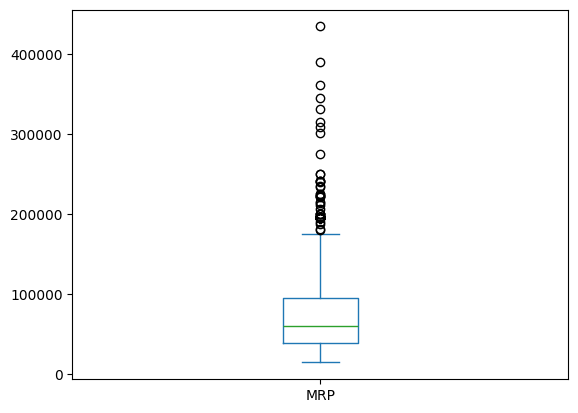

In [18]:
df['MRP'].plot(kind="box")

## Data Transformation

 - Log Transformation
 - Square Transformation
 - Reciprocal
 - Log
 - Power

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\2505286890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MRP'].apply(np.log1p))


<Axes: xlabel='MRP', ylabel='Density'>

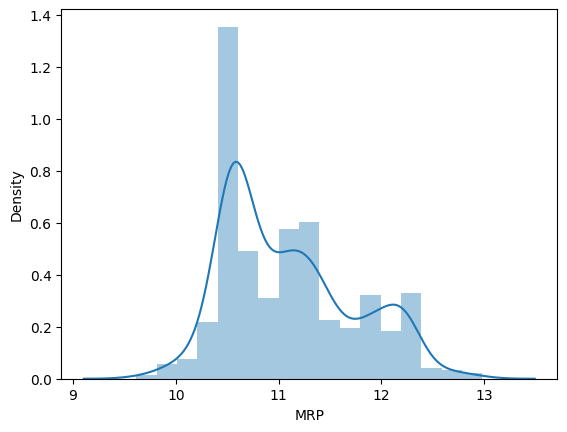

In [19]:
sns.distplot(df['MRP'].apply(np.log1p))

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\32820868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MRP'].apply(np.reciprocal))


<Axes: xlabel='MRP', ylabel='Density'>

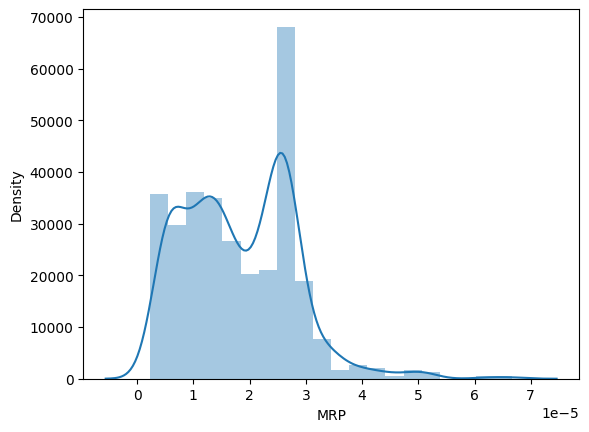

In [20]:
sns.distplot(df['MRP'].apply(np.reciprocal))

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\2995689011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MRP'].apply(np.square))


<Axes: xlabel='MRP', ylabel='Density'>

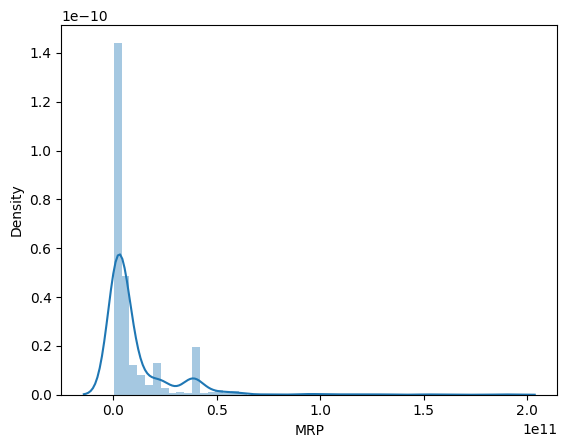

In [21]:
sns.distplot(df['MRP'].apply(np.square))

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\1064469864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.power(df['MRP'], 0.0007))


<Axes: xlabel='MRP', ylabel='Density'>

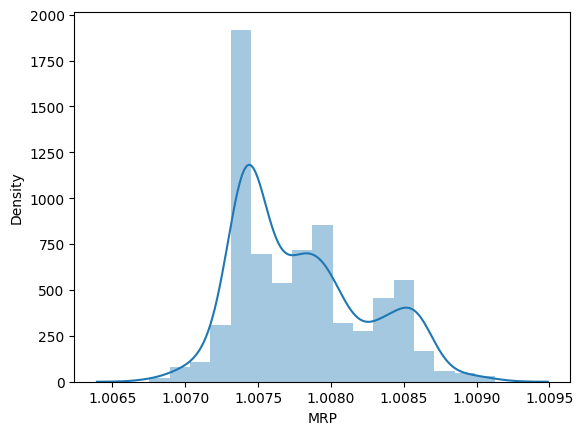

In [22]:
sns.distplot(np.power(df['MRP'], 0.0007))

**Capping Outlier**

In [23]:
percentile25 = df.MRP.quantile(0.25)
percentile75 = df.MRP.quantile(0.75)

In [24]:
percentile25

np.float64(38996.75)

In [25]:
percentile75

np.float64(95240.0)

In [26]:
# IQR

iqr = percentile75 - percentile25

In [27]:
iqr

np.float64(56243.25)

In [28]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [29]:
upper_limit

np.float64(179604.875)

In [30]:
lower_limit

np.float64(-45368.125)

In [32]:
## Finding the Outlier

# select *
# from table_name
# where MRP > 179604.875

df[df['MRP'] > upper_limit]

,Product,MRP,Feature
15,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
27,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
41,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
56,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
70,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
...,...,...,...
689,ALIENWARE Core i7 10th Gen - (16 GB/512 GB SSD...,199990.0,NVIDIA GeForce GTX 1660 Ti15.6 inch Full HD LE...
694,ASUS ROG Zephyrus M16 (2022) with 90Whr Batter...,179990.0,Intel Core i7 Processor (12th Gen)16 GB DDR5 R...
701,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,196990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
712,ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/2...,233990.0,Intel Core i7 Processor (10th Gen)16 GB LPDDR3...


In [34]:
# select *
# from table_name
# where MRP < -45368.125 / 10000

df[df['MRP'] < lower_limit]

,Product,MRP,Feature


In [35]:
new_df_cap = df.copy()

In [36]:
# select * 
# from table_name
# where > upper_limit 

# alter table_name
# column old_value upper_limit

new_df_cap['MRP'] = np.where(
    new_df_cap['MRP'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['MRP'] < lower_limit,
        lower_limit,
        new_df_cap['MRP']
    )
)

In [38]:
new_df_cap.shape

(720, 3)

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\1578353615.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MRP'])
C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\1578353615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['MRP'])


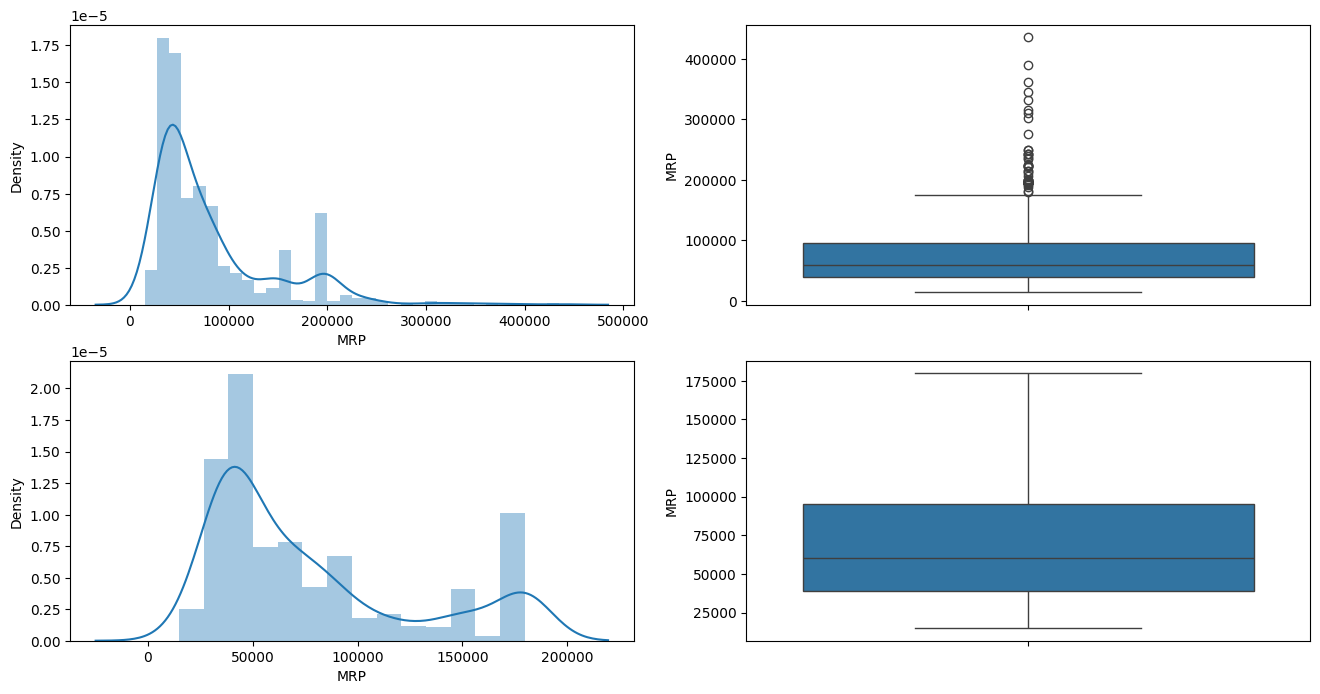

In [39]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['MRP'])

plt.subplot(2,2,2)
sns.boxplot(df['MRP'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['MRP'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['MRP'])

plt.show()

**Trimming Outlier**

In [43]:
# select MRP
# from laptop_data
# where < upper_limit

new_df = df[df['MRP'] < upper_limit]

In [45]:
new_df.shape

(636, 3)

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\1276536045.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MRP'])
C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\1276536045.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['MRP'])


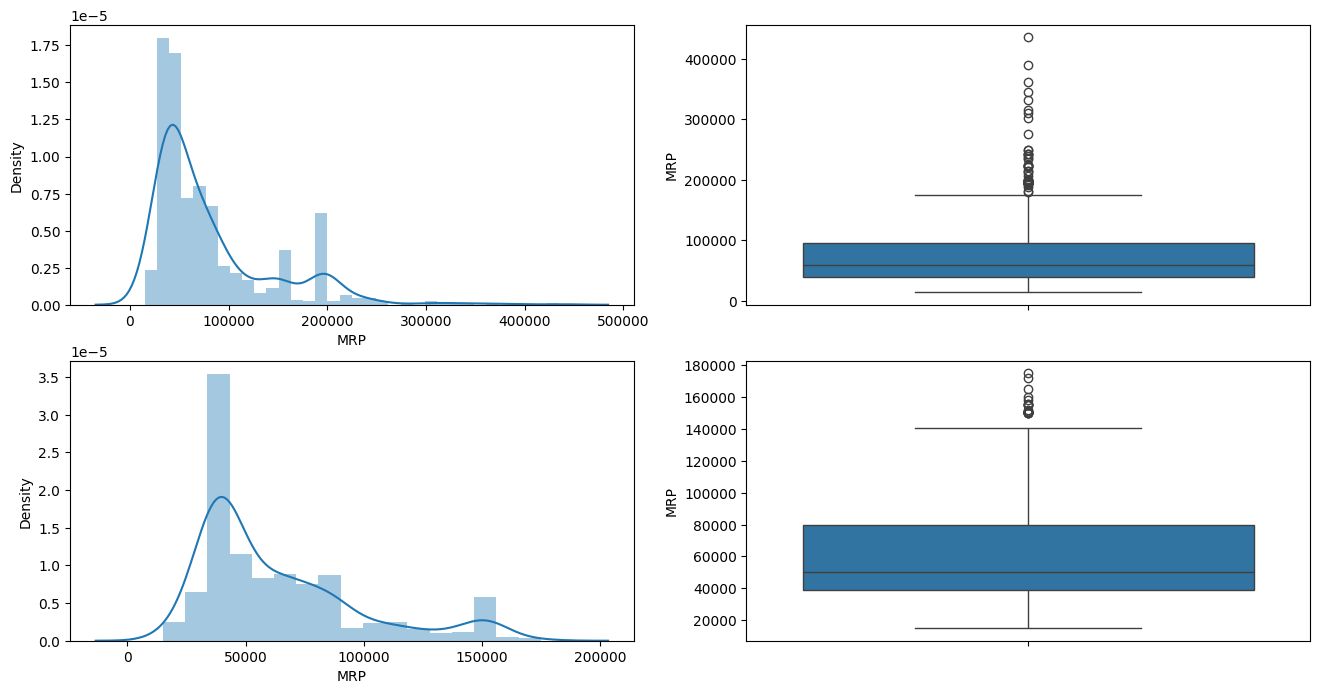

In [46]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['MRP'])

plt.subplot(2,2,2)
sns.boxplot(df['MRP'])

plt.subplot(2,2,3)
sns.distplot(new_df['MRP'])

plt.subplot(2,2,4)
sns.boxplot(new_df['MRP'])

plt.show()

In [47]:
df.head()

,Product,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


### **Data need to be extract**

- Brand Name
- Ram Type
- Ram Size
- OS
- Disk Type
- Disk Size
- Proccessor
- GPU
- Warranty
- Screen Size

**Brand Name**

A laptop brand name refers to the name of the company that manufactures and sells laptops. There are numerous laptop brands in the market, each with its unique features, design, and price range. Popular laptop brands include Apple, Dell, HP, Lenovo, Acer, ASUS, MSI, Razer, Samsung, and LG. Each of these brands has its strengths and weaknesses, and consumers often choose a laptop brand based on their specific needs and preferences.

In [48]:
# Splitting data into Three parts to that i can fetch brand name and others 

temp1 = df['Product'].str.split('GB', n=3, expand=True)

In [49]:
temp1

,0,1,2,3
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/256,SSD/Windows 11 Home) 14ITL05 Thin and Light L...,None
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/512,SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...,None
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8,/512,SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...,None
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8,/512,SSD/Windows 10/4,Graphics/NVIDIA GeForce ...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8,/512,SSD/Windows 11 Home/4,Graphics/NVIDIA GeForce G...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,/64,EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,None
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,/512,SSD/Windows 11 Home/4,Graphic...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,/1 TB SSD/Windows 11 Home/8,Graphics/NVIDIA ...,None
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,/512,SSD/Windows 11 Home) UP5...,None


In [50]:
temp1[0][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 '

In [51]:
temp1[0]

0                Lenovo IdeaPad 3 Core i3 11th Gen - (8 
1                Lenovo IdeaPad 3 Core i3 11th Gen - (8 
2         ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 
3       HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 
4             ASUS TUF Gaming F15 Core i5 10th Gen - (8 
                             ...                        
715    ASUS Chromebook Flip Touch Celeron Dual Core -...
716    Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...
717    ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...
718    ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...
719        Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 
Name: 0, Length: 720, dtype: object

In [52]:
temp1[1]

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [53]:
# Printing temp1 third column

temp1[2]

0       SSD/Windows 11 Home) 14ITL05 Thin and Light L...
1       SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...
2       SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...
3                                      SSD/Windows 10/4 
4                                 SSD/Windows 11 Home/4 
                             ...                        
715       EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...
716                               SSD/Windows 11 Home/4 
717                                  Graphics/NVIDIA ...
718                          SSD/Windows 11 Home) UP5...
719                  SSD/Windows 10 Home) 15IIL05 Laptop
Name: 2, Length: 720, dtype: object

**Findings**

- I think temp1 first column well help me to extact Laptop Brand Name
- And Fetching Hard Disk size into temp second column

In [55]:
# temp1 first column into temp1s variable

temp1s = temp1[0]

In [56]:
 # Converting Series into Dataframe

temp1s = pd.DataFrame(temp1s)
temp1s

,0
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8
...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...


In [57]:
# Fetching Laptop Brand Name Using Split function and Indexing 

brand = temp1s[0].str.split().str[0]
brand.value_counts()

0
ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: count, dtype: int64

In [58]:
# Adding brand column into main DataFrame

df['Brand Name'] = brand
df.head()

,Product,MRP,Feature,Brand Name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [59]:
df['Brand Name'].value_counts()

Brand Name
ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: count, dtype: int64

In [60]:
# To prevent overfitting less brand values store into Others Variable

df['Brand Name'] = df['Brand Name'].str.replace('realme','Others')
df['Brand Name'] = df['Brand Name'].str.replace('SAMSUNG','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Ultimus','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Vaio','Others')
df['Brand Name'] = df['Brand Name'].str.replace('GIGABYTE','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Nokia','Others')
df['Brand Name'] = df['Brand Name'].str.replace('ALIENWARE','DELL')

In [61]:
df['Brand Name'].value_counts()

Brand Name
ASUS         251
Lenovo       196
DELL          64
HP            61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
Others        13
Name: count, dtype: int64

**Finding**

- To prevent outlier less brand values store into Others Variable

**Operating System (OS)**

An operating system (OS) is a software that manages a computer's hardware and provides services for running applications. It serves as a bridge between the hardware and the software, enabling users to interact with the computer and its resources. Examples of popular operating systems for laptops include Windows, macOS, and Linux. Each operating system has its unique interface, features, and compatibility with applications. The operating system manages tasks such as memory allocation, process management, file systems, and security. It also provides a platform for developers to create and run applications that work seamlessly with the hardware and other software components. The choice of operating system can significantly impact a laptop's performance, usability, and security, and it's essential to choose the one that best fits your needs and preferences.

In [62]:
import re

# Regular expression to extract the Operating System (OS) from the "Feature" column
regex_os = r'(Windows|MAC)'

# Function to extract the OS information from a string using regex
def extract_os(text):
    match = re.search(regex_os, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the OS information
df['OS'] = df['Feature'].apply(extract_os)
df['OS'].value_counts()

OS
Windows    690
Mac         19
Others      11
Name: count, dtype: int64

**Finding**

- Windows Laptops are more in compare to others 
- Apple Laptops is less because of expensive
- Others maybe linux or andriod OS

In [63]:
df.head()

,Product,MRP,Feature,Brand Name,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows


**RAM Type**

Laptop RAM (Random Access Memory) type refers to the type of memory technology used in a laptop to temporarily store data that the CPU (Central Processing Unit) needs to access quickly. There are several types of laptop RAM available in the market, including DDR (Double Data Rate) SDRAM (Synchronous Dynamic Random Access Memory), DDR2 SDRAM, DDR3 SDRAM, DDR4 SDRAM, and DDR5 SDRAM. Each type of RAM offers different levels of speed, power consumption, and capacity. DDR4 SDRAM is currently the most commonly used type of RAM in laptops, offering a good balance of speed, power efficiency, and capacity. When buying a laptop, it's essential to consider the type and amount of RAM the laptop has, as it can significantly impact its performance and multitasking capabilities.

In [64]:
regex_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

def extract_ram_type(text):
    match = re.search(regex_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None

df['Ram Type'] = df['Feature'].apply(extract_ram_type)

df['Ram Type'].value_counts()

Ram Type
DDR4       561
DDR5        92
LPDDR4X     37
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: count, dtype: int64

In [65]:
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR5','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR4','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR3','Others')
df['Ram Type'].value_counts()

Ram Type
DDR4       561
DDR5        92
OthersX     37
Others      18
Name: count, dtype: int64

In [66]:
df['Ram Type'] = df['Ram Type'].str.replace('OthersX','Others')
df['Ram Type'].value_counts()

Ram Type
DDR4      561
DDR5       92
Others     55
Name: count, dtype: int64

In [67]:
df['Ram Type'].unique()

array(['DDR4', 'DDR5', 'Others', None], dtype=object)

In [68]:
df['Ram Type'].fillna('Others', inplace=True)

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\2716671850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ram Type'].fillna('Others', inplace=True)


In [69]:
df['Ram Type'].unique()

array(['DDR4', 'DDR5', 'Others'], dtype=object)

In [70]:
df['Ram Type'].value_counts()

Ram Type
DDR4      561
DDR5       92
Others     67
Name: count, dtype: int64

**Findings**

- To prevent overfitting less ram type values store into Others Variable

In [71]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4


**RAM**

Laptop RAM (Random Access Memory) is a type of computer memory that stores data temporarily and allows the CPU (Central Processing Unit) to access it quickly. RAM plays a crucial role in the performance of a laptop, as it helps to determine how many applications and processes the laptop can handle simultaneously. The amount of RAM in a laptop can range from 2GB to 32GB or more, and it can be upgraded in some cases. The speed of the RAM, measured in MHz or GHz, also affects the laptop's performance. Faster RAM allows for quicker data transfer and improves overall system responsiveness. When purchasing a laptop, it's important to consider the amount and speed of the RAM to ensure optimal performance for your specific needs.

In [72]:
regex_ram = r'(\d+)\s*(?:GB|MB)(?:\s*DDR\d)?'

# Function to extract RAM information from a string using regex
def extract_ram(text):
    match = re.search(regex_ram, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)}GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the RAM information
df['RAM'] = df['Feature'].apply(extract_ram)

# Print the count of each RAM size
df['RAM'].value_counts()

RAM
8GB      400
16GB     263
4GB       38
32GB      17
128GB      2
Name: count, dtype: int64

In [73]:
df['RAM'] = df['RAM'].str.replace('8GB','8')
df['RAM'] = df['RAM'].str.replace('16GB','16')
df['RAM'] = df['RAM'].str.replace('4GB','4')
df['RAM'] = df['RAM'].str.replace('32GB','32')
df['RAM'] = df['RAM'].str.replace('128GB','32')
df['RAM'] = df['RAM'].str.replace('128','32')

In [74]:
df['RAM'].value_counts()

RAM
8     400
16    263
4      38
32     19
Name: count, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   MRP         720 non-null    float32
 2   Feature     720 non-null    object 
 3   Brand Name  720 non-null    object 
 4   OS          720 non-null    object 
 5   Ram Type    720 non-null    object 
 6   RAM         720 non-null    object 
dtypes: float32(1), object(6)
memory usage: 36.7+ KB


In [76]:
df['RAM'] = df['RAM'].astype('int32')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   MRP         720 non-null    float32
 2   Feature     720 non-null    object 
 3   Brand Name  720 non-null    object 
 4   OS          720 non-null    object 
 5   Ram Type    720 non-null    object 
 6   RAM         720 non-null    int32  
dtypes: float32(1), int32(1), object(5)
memory usage: 33.9+ KB


In [78]:
df['RAM'].value_counts()

RAM
8     400
16    263
4      38
32     19
Name: count, dtype: int64

In [79]:
df['RAM'].unique()

array([ 8, 16,  4, 32], dtype=int32)

In [80]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8


**Findings**

- 8 GB RAM Laptops are more in compare to others. 
- Two laptops RAM size is 128 GB. It will affect the ML Model so I decided so merge into 32 GB RAM size.

**Disk Type**

Disk type refers to the physical storage device used in a laptop or other computing device to store data, programs, and other digital content. There are two main types of disk storage: hard disk drives (HDD) and solid-state drives (SSD).

HDDs are the traditional type of disk storage, and they consist of spinning disks that store data on magnetic surfaces. HDDs are generally cheaper and offer larger storage capacities than SSDs, but they are also slower and more prone to failure due to their mechanical components.

SSDs are a newer type of disk storage that uses flash memory to store data. SSDs are faster and more reliable than HDDs, and they consume less power, which can result in longer battery life for laptops. However, SSDs are generally more expensive than HDDs, and they offer smaller storage capacities.

In recent years, hybrid drives have also become available, which combine the large storage capacity of an HDD with the speed and reliability of an SSD. Hybrid drives use a smaller amount of solid-state memory as a cache to speed up frequently accessed data, while storing less frequently accessed data on the traditional spinning disk.

When choosing a laptop, the type of disk storage is an important factor to consider, as it can affect the speed, performance, and cost of the laptop. If the user needs large amounts of storage at a lower cost, an HDD may be a better choice, while if speed and reliability are more important, an SSD may be a better choice.

In [81]:
df['Disk Type'] = df['Product'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )
df['Disk Type'].value_counts()

Disk Type
SSD    672
HDD     48
Name: count, dtype: int64

In [82]:
df['Disk Type'].unique()

array(['SSD', 'HDD'], dtype=object)

In [83]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD


**Disk Size**

Disk size refers to the amount of storage space available on a laptop's hard drive or solid-state drive (SSD). The disk size is typically measured in gigabytes (GB) or terabytes (TB).

The disk size is an important consideration when choosing a laptop, as it determines how much data the laptop can store. The amount of storage required will depend on the user's needs, such as whether they will be storing large files, such as photos or videos, or mainly using cloud storage.

Laptop disk sizes can vary widely, with smaller laptops typically offering 128GB or 256GB of storage, while larger laptops may offer 1TB or more. In recent years, it has become increasingly common for laptops to offer both a solid-state drive (SSD) and a traditional hard drive (HDD), with the SSD used for the operating system and frequently accessed files, while the HDD is used for storing larger files.

It is important to consider the amount of storage required when choosing a laptop, as it can affect the performance and usability of the device. A laptop with insufficient storage space may become slow and sluggish, while a laptop with too much storage space may be more expensive than necessary.

In [84]:
temp1[1]

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [85]:
DISKSIZE =  temp1[1]
DISKSIZE

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [86]:
DISKSIZE.value_counts()

1
/512                                                                375
/256                                                                 99
/1 TB SSD/Windows 11 Home/4                                          38
/1 TB SSD/Windows 11 Hom...                                          31
/1 TB SSD/Windows 11 Home/8                                          27
/1 TB HDD/256                                                        26
/1 TB SSD/Win...                                                     25
/1 TB SSD/Windows 11 Home/6                                          11
/128                                                                  8
/64                                                                   7
/1 TB SSD/Windows 10 Home/4                                           6
/1 TB SSD/Windows 11 ...                                              6
/1 TB SSD/Windows 10 Home/6                                           5
/1 TB SSD/Windows 10 Home/8                                   

In [87]:
DISKSIZE = DISKSIZE.str.replace('/','')

In [88]:
DISKSIZE.value_counts()

1
512                                                               375
256                                                                99
1 TB SSDWindows 11 Home4                                           38
1 TB SSDWindows 11 Hom...                                          31
1 TB SSDWindows 11 Home8                                           27
1 TB HDD256                                                        26
1 TB SSDWin...                                                     25
1 TB SSDWindows 11 Home6                                           11
128                                                                 8
64                                                                  7
1 TB SSDWindows 10 Home4                                            6
1 TB SSDWindows 11 ...                                              6
1 TB SSDWindows 10 Home6                                            5
1 TB SSDWindows 10 Home8                                            4
1 TB SSDWindows 11

In [89]:
DISKSIZE = DISKSIZE.str.split().str[0]
DISKSIZE = DISKSIZE.astype('int')
DISKSIZE

0      256
1      512
2      512
3      512
4      512
      ... 
715     64
716    512
717      1
718    512
719      1
Name: 1, Length: 720, dtype: int64

In [90]:
DISKSIZE.value_counts()

1
512    375
1      223
256     99
128      8
64       7
2        7
32       1
Name: count, dtype: int64

In [91]:
df['DISK SIZE'] = DISKSIZE

In [92]:
df['DISK SIZE'] = df['DISK SIZE'].replace(1,1024)
df['DISK SIZE'] = df['DISK SIZE'].replace(2,2048)

In [93]:
df['DISK SIZE'].value_counts()

DISK SIZE
512     375
1024    223
256      99
128       8
64        7
2048      7
32        1
Name: count, dtype: int64

In [94]:
df['DISK SIZE'] = df['DISK SIZE'].replace(32,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(64,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(2048,1024)
df['DISK SIZE'].value_counts()

DISK SIZE
512     375
1024    230
256      99
128      16
Name: count, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   MRP         720 non-null    float32
 2   Feature     720 non-null    object 
 3   Brand Name  720 non-null    object 
 4   OS          720 non-null    object 
 5   Ram Type    720 non-null    object 
 6   RAM         720 non-null    int32  
 7   Disk Type   720 non-null    object 
 8   DISK SIZE   720 non-null    int64  
dtypes: float32(1), int32(1), int64(1), object(6)
memory usage: 45.1+ KB


In [96]:
df['DISK SIZE'].unique()

array([ 256,  512, 1024,  128])

In [97]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512


**Findings**

- 512 GB Storage Size are more in compare to others.
- To prevent Outlier I merge extreme values to thers values.

**Processor**

A laptop processor is the main component of a computer that carries out instructions and performs calculations necessary for various tasks. The processor is also known as the Central Processing Unit (CPU), and it is responsible for executing programs and running the operating system.

There are two major manufacturers of laptop processors, Intel and AMD. Intel's processors are generally considered to be the industry standard and are used in many laptops. AMD's processors are less common but are becoming increasingly popular.

Processors are characterized by several key features, including clock speed (measured in GHz), number of cores (which affects multitasking performance), cache size (which affects data transfer speeds), and power consumption. The higher the clock speed and number of cores, the more powerful the processor, but this also tends to result in higher power consumption and heat output.

In recent years, laptop processors have become more efficient and powerful, making it possible to perform demanding tasks such as gaming and video editing on a laptop. However, desktop processors still tend to be more powerful due to their larger size and better cooling capabilities.

In [98]:
# Define regular expression pattern for processor name
regex_processor = r'(?:Intel|AMD)\s+[A-Za-z\d]+'

# Function to extract processor name from a string using regex
def extract_processor(text):
    match = re.search(regex_processor, text, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the processor information
df['Processor'] = df['Feature'].apply(extract_processor)
df['Processor'].value_counts()

Processor
Intel Core       355
AMD Ryzen        307
Intel Celeron     23
Intel Pentium      5
Intel i3           3
AMD Athlon         2
Intel Evo          2
Intel PQC          1
AMD Dual           1
Intel i7           1
Name: count, dtype: int64

In [99]:
# Function to extract processor brand information from a string using regex
def extract_processor_brand(text):
    if re.search(r"intel", text, re.IGNORECASE):
        return "Intel"
    elif re.search(r"amd", text, re.IGNORECASE):
        return "AMD"
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the processor brand information
df['Processor'] = df['Feature'].apply(extract_processor_brand)
df['Processor'].value_counts()

Processor
Intel     390
AMD       310
Others     20
Name: count, dtype: int64

In [100]:
df['Processor'].unique()

array(['Intel', 'AMD', 'Others'], dtype=object)

In [101]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel


**Findings**

- Majorly Two categories of Processor so i decided to categorize then. 

**Graphical Processing Unit (GPU)**

A laptop GPU (Graphics Processing Unit) is a specialized processor that is responsible for rendering graphics and images on a laptop. The GPU is designed to work in conjunction with the CPU to provide the necessary processing power for various visual applications.

There are two main manufacturers of laptop GPUs, NVIDIA and AMD. NVIDIA is the industry leader and its GPUs are used in a wide range of laptops, while AMD's GPUs are less common but are becoming more popular.

The performance of a laptop GPU is measured in terms of its clock speed, memory size, memory speed, and number of CUDA cores or stream processors. The clock speed is the frequency at which the GPU operates, while the memory size and speed determine the amount and speed of data that can be processed by the GPU. The number of CUDA cores or stream processors determines the number of parallel processing units within the GPU.

A powerful laptop GPU is essential for tasks such as gaming, video editing, and 3D modeling, as these applications require a lot of graphical processing power. However, a powerful GPU also tends to consume more power and generate more heat, which can affect battery life and laptop performance.

In recent years, laptop GPUs have become more efficient and powerful, making it possible to perform demanding visual tasks on a laptop. However, for the most demanding tasks, a desktop GPU still tends to be more powerful due to its larger size and better cooling capabilities.

In [102]:
# Regular expression pattern to match GPU name and memory size
regex_gpu = r'(\bNVIDIA\b|\bAMD\b).*?(\d+)\s*GB'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} {match.group(2)} GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

GPU
AMD 16 GB        155
AMD 8 GB         146
AMD 32 GB          4
NVIDIA 16 GB       3
NVIDIA 8 GB        2
NVIDIA 2 GB        1
AMD 4 GB           1
NVIDIA 4 GB        1
NVIDIA 32 GB       1
NVIDIA 128 GB      1
Name: count, dtype: int64

In [103]:
regex_gpu = r'(NVIDIA|AMD|Intel)\s[\w\s]+\d{3,4}'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return 'Others'

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

GPU
Others    533
AMD       156
Intel      20
NVIDIA     11
Name: count, dtype: int64

In [104]:
df['GPU'].unique()

array(['Others', 'AMD', 'Intel', 'NVIDIA'], dtype=object)

In [105]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others


**Findings**

- Majorly Laptops and Integrated Graphics. 
- AMD GPU is more as compare to others.
- NVIDIA GPU is less just because of expensive.
- Intel are play majorly Integrated Graphics.

**Warranty**

A laptop warranty is a guarantee that the manufacturer provides to cover defects in materials and workmanship for a specific period of time. The warranty period varies by manufacturer, but it typically ranges from one to three years.

The warranty covers the cost of repairing or replacing parts that fail due to defects in materials or workmanship. However, it does not cover damage caused by accidents, misuse, or normal wear and tear. Some warranties may also exclude certain types of components, such as batteries or accessories.

To make a claim under the warranty, the owner of the laptop must contact the manufacturer or its authorized service provider. The manufacturer will then diagnose the problem and either repair or replace the defective part.

It is important to note that warranties may vary in terms of what they cover and the extent of the coverage. Some warranties may include additional services, such as technical support or on-site repairs, while others may have limitations or exclusions.

It is recommended to read the terms and conditions of the warranty carefully before purchasing a laptop, and to consider purchasing an extended warranty if one is available, especially if the laptop is used for critical work or if it is an expensive model.

In [106]:
# Regular expression to match warranty duration
regex_warranty = r'(\d+)\s*(?:year|yr|y)(?:s)?'

# Function to extract warranty information from a string using regex
def extract_warranty(text):
    match = re.search(regex_warranty, text, re.IGNORECASE)
    if match:
        years = int(match.group(1))
        if years == 1:
            return f"{years} year warranty"
        elif years > 1:
            return f"{years} years warranty"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the warranty information
df['Warranty'] = df['Feature'].apply(extract_warranty)
df['Warranty'].value_counts()

Warranty
1 year warranty         479
2 years warranty         85
20212 years warranty     68
20211 years warranty     41
20191 years warranty     31
20193 years warranty      4
3 years warranty          4
32 years warranty         3
20192 years warranty      3
3652 years warranty       1
Name: count, dtype: int64

In [107]:
df['Warranty'] = df['Warranty'].str.replace('1 year warranty','1')
df['Warranty'] = df['Warranty'].str.replace('2 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20212 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20211 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20191 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20193 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('3 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('32 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20192 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('3652 years warranty','2')

In [108]:
df.Warranty.value_counts()

Warranty
1        551
2         85
20212     68
3          8
32         3
20192      3
3652       1
Name: count, dtype: int64

In [109]:
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('32','2')
df['Warranty'] = df['Warranty'].str.replace('20192','2')
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('3652','2')

In [110]:
df.Warranty.value_counts()

Warranty
1    551
2    160
3      8
Name: count, dtype: int64

In [111]:
df['Warranty'] = df['Warranty'].str.replace('3','2')
df.Warranty.value_counts()

Warranty
1    551
2    168
Name: count, dtype: int64

In [112]:
df.Warranty.unique()

array(['2', '1', None], dtype=object)

In [113]:
df.Warranty.fillna('2',inplace=True)

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\1372586119.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Warranty.fillna('2',inplace=True)


In [114]:
df.Warranty.value_counts()

Warranty
1    551
2    169
Name: count, dtype: int64

In [115]:
df.Warranty.unique()

array(['2', '1'], dtype=object)

In [116]:
df['Warranty'] = df['Warranty'].astype('int32')

In [117]:
df.Warranty.value_counts()

Warranty
1    551
2    169
Name: count, dtype: int64

In [118]:
df.Warranty.unique()

array([2, 1], dtype=int32)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   MRP         720 non-null    float32
 2   Feature     720 non-null    object 
 3   Brand Name  720 non-null    object 
 4   OS          720 non-null    object 
 5   Ram Type    720 non-null    object 
 6   RAM         720 non-null    int32  
 7   Disk Type   720 non-null    object 
 8   DISK SIZE   720 non-null    int64  
 9   Processor   720 non-null    object 
 10  GPU         720 non-null    object 
 11  Warranty    720 non-null    int32  
dtypes: float32(1), int32(2), int64(1), object(8)
memory usage: 59.2+ KB


In [120]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1


**Findings**

- Majorly Laptops comes 1 Year of warranty
- 3 Year Warranty Laptops are only 8 so I decided to marge into 2 Year Warranty Laptops just because of preventy Outlier.

**Screen Size**

Laptop screen size refers to the diagonal measurement of the display screen, usually measured in inches. Screen size is an important factor to consider when choosing a laptop, as it can affect the user's comfort and the laptop's portability.

Laptop screen sizes typically range from 11 inches to 17 inches, with the most common sizes being 13 inches, 14 inches, and 15 inches. Smaller screens are generally more portable and lightweight, while larger screens offer more screen real estate and are better suited for tasks such as video editing or gaming.

Screen resolution is another important factor to consider, as it affects the clarity and sharpness of the displayed images. Higher resolutions result in sharper and more detailed images, but they also tend to be more demanding on the laptop's processing power and battery life.

In recent years, laptop screens have become more advanced and innovative, with features such as touchscreens, high refresh rates, and HDR support. These features can enhance the user's experience and productivity, but they also tend to increase the cost of the laptop.

When choosing a laptop, it is important to consider the user's needs and preferences, as well as their budget. A larger screen may be more comfortable for some users, while others may prioritize portability and opt for a smaller screen.

In [121]:
# Regular expression to match screen sizes

regex = r'(\d+(?:\.\d+)?)(?:\s*inch|"|\'\')'

# Function to extract screen sizes from a string using regex

def extract_screen_size(text):
    match = re.search(regex, text)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the screen sizes

df['ScreenSize'] = df['Feature'].apply(extract_screen_size)

In [122]:
df.ScreenSize.value_counts()

ScreenSize
15.6        362
14.0        103
13.3          9
16.0          6
16.1          5
16.2          5
17.3          5
11.6          4
14.1          4
15.0          4
14.2          2
13.0          1
13.5          1
16.6          1
206015.6      1
Name: count, dtype: int64

In [123]:
df['ScreenSize'] = df['ScreenSize'].astype('float64')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   MRP         720 non-null    float32
 2   Feature     720 non-null    object 
 3   Brand Name  720 non-null    object 
 4   OS          720 non-null    object 
 5   Ram Type    720 non-null    object 
 6   RAM         720 non-null    int32  
 7   Disk Type   720 non-null    object 
 8   DISK SIZE   720 non-null    int64  
 9   Processor   720 non-null    object 
 10  GPU         720 non-null    object 
 11  Warranty    720 non-null    int32  
 12  ScreenSize  513 non-null    float64
dtypes: float32(1), float64(1), int32(2), int64(1), object(8)
memory usage: 64.8+ KB


In [125]:
df['ScreenSize'] = df['ScreenSize'].replace(16.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.3, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.1, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(16.2, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(17.3, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.1, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(11.6, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(15.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.2, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(13.0, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(206015.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.5, 14.0)

In [126]:
df['ScreenSize'].value_counts()

ScreenSize
15.6    389
14.0    124
Name: count, dtype: int64

In [134]:
df['ScreenSize'].sample(5)

273    15.6
638     NaN
569    15.6
456    14.0
357    15.6
Name: ScreenSize, dtype: float64

In [135]:
df['ScreenSize'].unique()

array([14. , 15.6,  nan])

In [136]:
df['ScreenSize'].mean()

np.float64(15.213255360623782)

In [137]:
df['ScreenSize'].fillna(15.6, inplace=True)

C:\Users\azcom\AppData\Local\Temp\ipykernel_22144\710040018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ScreenSize'].fillna(15.6, inplace=True)


In [138]:
df['ScreenSize'].unique()

array([14. , 15.6])

In [139]:
df['ScreenSize'].value_counts()

ScreenSize
15.6    596
14.0    124
Name: count, dtype: int64

In [140]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


**Findings**

- 15.6 Inches laptops are more in compare to others
- In Screensize Column are they too many extreme value so I decided to cap into 14.0 and 15.6 Inches

In [141]:
df['GPU'].value_counts()

GPU
Others    533
AMD       156
Intel      20
NVIDIA     11
Name: count, dtype: int64

In [142]:
df['GPU'].unique()

array(['Others', 'AMD', 'Intel', 'NVIDIA'], dtype=object)

In [143]:
df.head()

,Product,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


In [144]:
df = df.rename(columns={'MRP': 'Price'})

In [145]:
df.head()

,Product,Price,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


In [146]:
# Reassigning the columns

df = df[['Brand Name','OS','Ram Type','RAM','Processor','GPU','Warranty','ScreenSize','Disk Type','DISK SIZE', 'Price']]

In [147]:
df.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE,Price
0,Lenovo,Windows,DDR4,8,Intel,Others,2,14.0,SSD,256,36990.0
1,Lenovo,Windows,DDR4,8,Intel,Others,2,15.6,SSD,512,39990.0
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,32990.0
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512,49990.0
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,49990.0
